## Causal analysis of the interference in ABM output
Change directory to one directory level up in `../output/`

In [104]:
import os

def moveDir(currentDir, folderName):
    index = os.getcwd().find("python")
    return os.getcwd()[:39] + folderName

os.chdir(moveDir(os.getcwd, "output"))
os.getcwd()

'/home/untik/IDEAprojects/ABM_CausalInf/output'

Select one file and explore it. What are the params defined for this SIM?

In [105]:
import csv

filename = os.listdir()[3]

with open(filename, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        for element in row:
            print(element)
        break
        
print(filename)

numPatients=1000
probInfected=5.0E-4
probVaccine=0.002
lambda=0.3
contagion=1.0
infectiousness=2.0
sexOnInfection=2.0
sexOnVaccine=2.0
vaccineOnInfection=2.0
promiscuityPopulation=0.005
maxPartnerForce=5.0
randomForce=5.0
partnerForce=3.0
970328296.csv


Lets open the whole dataframe:

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(filename, skiprows = 1)
df.head()

,step,agent,sex,vaccine,infection,degree,contagionDist,infectiousnessDist,indInterference
0,0,Patient_0,False,False,False,3,0.0,0.000000,0.0
1,0,Patient_1,True,False,False,2,0.0,0.415625,0.0
2,0,Patient_2,True,False,False,4,0.0,0.158387,0.0
3,0,Patient_3,True,False,False,3,0.0,0.100014,0.0
4,0,Patient_4,True,False,False,3,0.0,0.131369,0.0


What is the histogram of the `degree` column for the `step == 0`? 

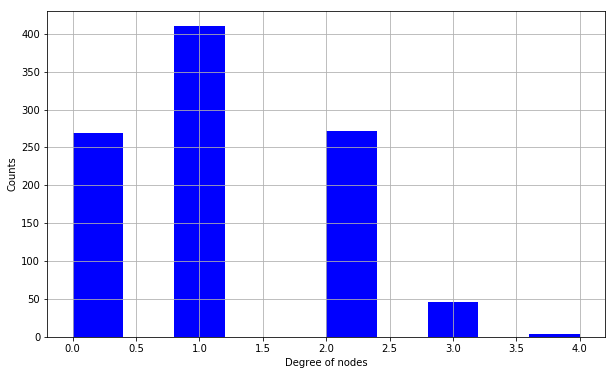

In [107]:
df[df.step == 5].degree.hist(figsize = (10,6), color = 'b')
plt.ylabel('Counts')
plt.xlabel('Degree of nodes')
plt.show()

## 1. Reorganise the dataFrame
The infectiousness and contagion do not affect the outcome in their current time but the outcome in a posterior time.
1. Create new, empty columns in the dataFrame: priorContagionDist, priorInfectiousnessDist, and priorIndInterference
2. Fill new columns with prior values of: contagionDist, infectiousnessDist, indInterference

In [108]:
newCols = ['priorContagionDist','priorInfectiousnessDist','priorIndInterference']

for i in newCols:
    df[i] = ""

df.head()

,step,agent,sex,vaccine,infection,degree,contagionDist,infectiousnessDist,indInterference,priorContagionDist,priorInfectiousnessDist,priorIndInterference
0,0,Patient_0,False,False,False,3,0.0,0.000000,0.0,,,
1,0,Patient_1,True,False,False,2,0.0,0.415625,0.0,,,
2,0,Patient_2,True,False,False,4,0.0,0.158387,0.0,,,
3,0,Patient_3,True,False,False,3,0.0,0.100014,0.0,,,
4,0,Patient_4,True,False,False,3,0.0,0.131369,0.0,,,


In [109]:
%%time

i = 1
cols = ['contagionDist','infectiousnessDist','indInterference']

while i < len(df.step.value_counts()):
    for k in range(len(cols)):
        df.loc[df.step == i, newCols[k]] = df.loc[df.step == i-1, cols[k]].values
    i +=1

CPU times: user 42.6 s, sys: 504 ms, total: 43.1 s
Wall time: 21.7 s


## 2. TableOne
What is the Standard Mean Difference of each variable with regards to `vaccine`?
<br/>TableOne src = https://pypi.org/project/tableone/ with both parametric and non-parametric tests.
<br/>Documentation: https://media.readthedocs.org/pdf/tableone/latest/tableone.pdf

In [110]:
from tableone import TableOne

columns = ['sex','vaccine','infection','degree',
           'contagionDist','infectiousnessDist','indInterference',
           'priorContagionDist','priorInfectiousnessDist','priorIndInterference',
          ]
categorical = ['sex','infection']
groupby = 'vaccine'

mytable = TableOne(df[df.step == 299], columns, categorical, groupby, pval = True)
mytable

Grouped by vaccine                                                      
                                          isnull         False          True   pval              ptest
variable                level                                                                         
n                                                          430           570                          
sex                     False                  0   297 (69.07)   212 (37.19)  0.000        Chi-squared
                        True                       133 (30.93)   358 (62.81)                          
infection               False                  0   277 (64.42)   381 (66.84)  0.464        Chi-squared
                        True                       153 (35.58)   189 (33.16)                          
degree                                         0   1.55 (0.72)   1.56 (0.69)  0.891  Two Sample T-test
contagionDist                                  0  11.49 (3.33)  11.28 (3.51)  0.347  Two Sample T-test
infectiousnessDist                             0  18.85 (5.44)  18.52 (5.78)  0.351  Two Sample T-test
indInterference                                0  -1.12 (0.66)  -1.08 (0.69)  0.353  Two Sample T-test
priorContagionDist                             0  11.42 (3.31)  11.23 (3.46)  0.383  Two Sample T-test
priorInfectiousnessDist                        0  18.68 (5.39)  18.42 (5.70)  0.460  Two Sample T-test
priorIndInterference                           0  -1.10 (0.69)  -1.12 (0.73)  0.684  Two Sample T-test
[1] Warning, Hartigans Dip Test reports possible multimodal distributions for: degree.
[2] Warning, test for normality reports non-normal distributions for: contagionDist, infectiousnessDist, priorContagionDist, priorIndInterference, priorInfectiousnessDist.

In [111]:
categorical = ['sex','infection']
groupby = 'vaccine'
nonnormal = columns

mytable = TableOne(df[df.step == 299], columns, categorical, groupby, nonnormal, pval = True)
mytable

Grouped by vaccine                                                                 
                                          isnull                False                 True   pval           ptest
variable                level                                                                                    
n                                                                 430                  570                       
sex                     False                  0          297 (69.07)          212 (37.19)  0.000     Chi-squared
                        True                              133 (30.93)          358 (62.81)                       
infection               False                  0          277 (64.42)          381 (66.84)  0.464     Chi-squared
                        True                              153 (35.58)          189 (33.16)                       
degree                                         0     2.00 [1.00,2.00]     2.00 [1.00,2.00]  0.781  Kruskal-Wallis
contagionDist                                  0   12.14 [9.08,14.35]   11.96 [8.45,14.38]  0.456  Kruskal-Wallis
infectiousnessDist                             0  19.81 [14.93,22.93]  19.28 [13.96,23.31]  0.353  Kruskal-Wallis
indInterference                                0  -1.06 [-1.62,-0.61]  -1.04 [-1.58,-0.55]  0.400  Kruskal-Wallis
priorContagionDist                             0   12.07 [8.92,14.27]   11.99 [8.44,14.24]  0.519  Kruskal-Wallis
priorInfectiousnessDist                        0  19.73 [14.57,22.85]  19.35 [14.06,22.88]  0.444  Kruskal-Wallis
priorIndInterference                           0  -1.04 [-1.57,-0.53]  -1.05 [-1.63,-0.52]  0.770  Kruskal-Wallis
[1] Warning, Hartigans Dip Test reports possible multimodal distributions for: degree.
[2] Warning, test for normality reports non-normal distributions for: contagionDist, infectiousnessDist, priorContagionDist, priorIndInterference, priorInfectiousnessDist.

## 3. Propensity score of confounders
What is the causal effect of the confounder, sex, on the treatment, vaccine?
<br/>Since sex looks like a confounder, it will be necessary to calculate a propersity score `ps` using a Logit regression in a IPTW method.
<br/>Statsmodels src = https://www.statsmodels.org/stable/index.html
<br/>Verbosity of `statsmodels`: https://stackoverflow.com/questions/23018306/how-to-silence-statsmodels-fit-in-python

In [129]:
import statsmodels.api as sm

dat = df[df.step == 150]
model = sm.Logit(endog = dat.vaccine,
                  exog = sm.add_constant(dat[['sex']].astype(float)),
                 ).fit(disp = 0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                vaccine   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Jun 2018   Pseudo R-squ.:                 0.04137
Time:                        10:33:26   Log-Likelihood:                -634.69
converged:                       True   LL-Null:                       -662.07
                                        LLR p-value:                 1.352e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0190      0.100    -10.149      0.000      -1.216      -0.822
sex            0.9823      0.135      7.275      0.000       0.718       1.247
==============================================================================
"""

Create a vector of weights `wt` based on the value of the vaccine and the propensity scores `ps` from the model:

In [113]:
import numpy as np

def getWeights(vaccine, ps):
    w = []
    i = 0
    while i < len(ps):
        if vaccine[i]:
            w.append(1/ps[i])
        else:
            w.append(1/(1 - ps[i]))
        
        i +=1
    return w

wt = getWeights(vaccine = list(dat.vaccine), ps = model.predict())

# Which are the unique values?
for counter,value in enumerate(np.unique(wt)):
    print('Weight %d: %.5f' % (counter,value))

Weight 0: 1.08298
Weight 1: 1.17464
Weight 2: 6.72603
Weight 3: 13.05128


How can I see the weighted data now? TableOne with weights for Python?
</br>src = https://stackoverflow.com/questions/17689099/using-describe-with-weighted-data-mean-standard-deviation-median-quantil nope
</br> CANT FIND ANYTHING!

## 4. Estimate Confounder Causal Effect
The causal effect of `sex` on `vaccine` has to be more or less constant though the simulation (look at parameters above) but it is a stochastic simulation, how are the histograms?
</br>A recall from Odds Ratio, probabilities, and Logit regression: https://www.youtube.com/watch?v=8nm0G-1uJzA
 - What if I forget to include the `add_constant` in `statsmodels`?
 - Which implementation is faster? `statsmodels` or `sklearn`?

In [114]:
i = 10
sex = []
sexCnt = []
sexTime = []
numSteps = 299

while i < numSteps:
    dat = df[df.step == i]
    depvar = ['sex']
    
    try:
        results = sm.Logit(endog = dat.vaccine, exog = dat[depvar].astype(float)).fit(disp = 0)
        resultsCnt = sm.Logit(endog = dat.vaccine, exog = sm.add_constant(dat[depvar].astype(float))).fit(disp = 0)
    except:
        print('Not enough vaccinated agents to calculate')
    
    sex.append([results.params[0], resultsCnt.params[1]])
    sexTime.append([i,resultsCnt.params[1]])
    i +=1

How the Odds Ratio varies thoughout the simulation?

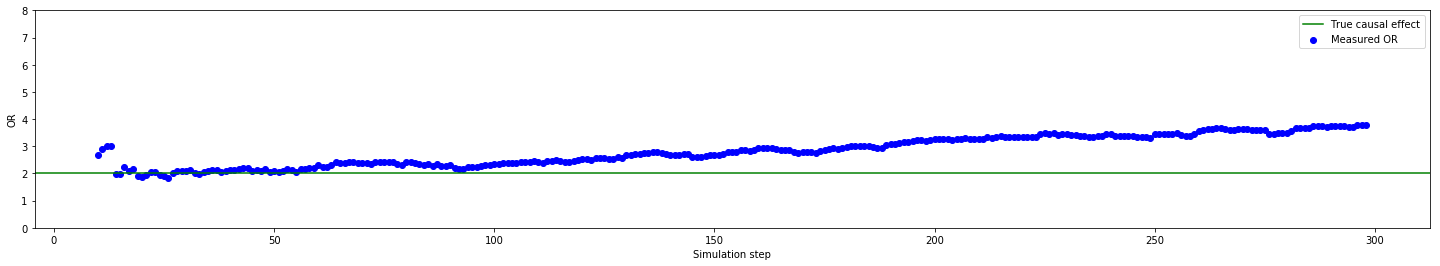

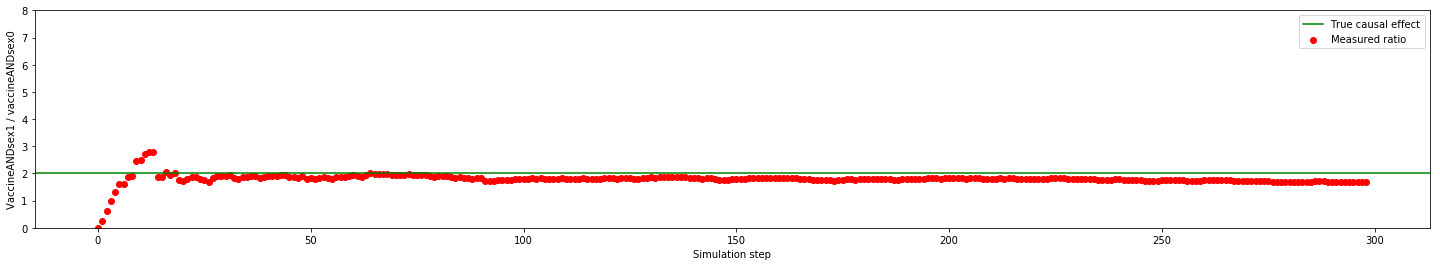

In [115]:
i = 0
ratio = []

while i < numSteps:
    sexVaccine = sum(df.loc[df.step == i, ['sex']].values * df.loc[df.step == i, ['vaccine']].values)[0]
    NoSexVaccine = sum(np.invert(df.loc[df.step == i, ['sex']].values) * df.loc[df.step == i, ['vaccine']].values)[0]
    
    try:
        ratio.append([i, sexVaccine/NoSexVaccine])
        i +=1
    except:
        print('No enough sex 0 with vaccine')
        i +=1
        
draw2 = pd.DataFrame(sexTime, columns = ['step','coef'])
draw3 = pd.DataFrame(ratio, columns = ['step','ratio'])

figsize = (25,4)

plt.figure(figsize=figsize)
plt.scatter(draw2.step, np.exp(draw2.coef), color = 'b', label = 'Measured OR')
plt.axhline(2, color = 'green', label = 'True causal effect')
plt.xlabel('Simulation step')
plt.ylabel('OR')
plt.ylim(0,8)
plt.legend()
plt.show()

plt.figure(figsize=figsize)
plt.scatter(draw3.step, draw3.ratio, color = 'r', label = 'Measured ratio')
plt.axhline(2, color = 'green', label = 'True causal effect')
plt.xlabel('Simulation step')
plt.ylabel('VaccineANDsex1 / vaccineANDsex0')
plt.ylim(0,8)
plt.legend()
plt.show()

What is the estimated causal effect `sexOnVaccine` and the CI?

In [116]:
import scipy as sp
import scipy.stats

def meanCI(data, confidence=0.975):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m-h, m, m+h

print('\nCI and mean for OR:')
print(meanCI(np.exp(draw2.coef)))
print('\nCI and mean for ratio:')
print(meanCI(draw3.ratio))


CI and mean for OR:
(2.761886321111088, 2.834629130705034, 2.90737194029898)

CI and mean for ratio:
(1.775136009730059, 1.8024799646508571, 1.8298239195716552)


## 5. Estimator of remaining causal effects
Now I will create a weighted model, without confounding, to predict the infection at each step of the simulation:

\begin{align}
\ Infection = Vaccine + Sex + priorInfectiousnessDist + priorContagionDist + infectiousnessDist + contagionDist \\
\end{align}

Source for Jupyter formulas: http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html

In [125]:
dat = df[df.step == 100]

model = sm.Logit(endog = dat.vaccine,
                 exog = sm.add_constant(dat[['sex']].astype(float)),
                 ).fit(disp = 0)

wt = getWeights(vaccine = list(dat.vaccine), ps = model.predict())

# Which are the unique values?
for counter,value in enumerate(np.unique(wt)):
    print('Weight %d: %.5f' % (counter,value))

Weight 0: 1.23544
Weight 1: 1.55380
Weight 2: 2.80571
Weight 3: 5.24742


In [136]:
dat = df[df.step == 299]

model = sm.Logit(endog = dat.vaccine,
                 exog = sm.add_constant(dat[['sex']].astype(float)),
                 ).fit(disp = 0)

wt = getWeights(vaccine = list(dat.vaccine), ps = model.predict())

# Which are the unique values?
for counter,value in enumerate(np.unique(wt)):
    print('Weight %d: %.5f' % (counter,value))

Weight 0: 1.37151
Weight 1: 1.71380
Weight 2: 2.40094
Weight 3: 3.69173


In [137]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                vaccine   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Jun 2018   Pseudo R-squ.:                 0.07438
Time:                        10:43:01   Log-Likelihood:                -632.49
converged:                       True   LL-Null:                       -683.31
                                        LLR p-value:                 6.613e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3371      0.090     -3.750      0.000      -0.513      -0.161
sex            1.3273      0.136      9.786      0.000       1.061       1.593
==============================================================================
"""

Why do I get different results for:
 -  `SGDClassifier` from http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
 -  `LogisticRegression` from http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

__Solution__: default regularisation term and shuffling. In SGDC is `alpha` that is the inverse of `C` in LogitReg

In [139]:
from sklearn.linear_model import SGDClassifier as logit1
from sklearn.linear_model import LogisticRegression as logit2

coef = []
coef2 = []
for i in range(1000):
    logit_1 = logit1(loss = 'log', penalty='none', alpha = 1e-2, fit_intercept = True, max_iter = 1e5, tol = 1e-2, random_state=i, average=False,)
    logit_1.fit(dat.sex.values.reshape(-1, 1), dat.vaccine)
    coef.append(logit_1.coef_[0][0])
    
    logit_2 = logit2(fit_intercept = True, max_iter = 1e5, tol = 1e-2, random_state=i, C=100.0)
    logit_2.fit(dat.sex.values.reshape(-1, 1), dat.vaccine)   
    coef2.append(logit_2.coef_[0][0])

print("SGDC:  ", meanCI(coef))
print("Logit: ", meanCI(coef2))

SGDC:   (1.3351631390077485, 1.340177005339336, 1.3451908716709235)
Logit:  (1.325881031308711, 1.325881031308711, 1.325881031308711)
